In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
 #Memanggil dataset file .csv 
df =pd.read_csv("G:\\Kuliah\\Semester6\\Data Mining\\TA\\OnlineRetail.csv", encoding='unicode_escape')

In [3]:
#Melihat semua nama kolom 
df.keys() 

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
#Menemukan no. dari baris dan kolom
df.shape 

(541909, 8)

In [5]:
#Melihat beberapa detail dasar kumpulan data
df.describe() 

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
#Menghapus redundansi/preprocessing data
df=df[df["Quantity"]>0]
df.shape
df.describe() #melihat detail dasar tentang set data setelah menghapus redundansi

,Quantity,UnitPrice,CustomerID
count,531285.000000,531285.000000,397924.000000
mean,10.655262,3.857296,15294.315171
std,156.830323,41.810047,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [7]:
df.head() #melihat 5 baris pertama kumpulan data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    531285 non-null  object 
 1   StockCode    531285 non-null  object 
 2   Description  530693 non-null  object 
 3   Quantity     531285 non-null  int64  
 4   InvoiceDate  531285 non-null  object 
 5   UnitPrice    531285 non-null  float64
 6   CustomerID   397924 non-null  float64
 7   Country      531285 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


In [9]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"]) #mengubah menjadi datetime
df.info() #mendapatkan semua informasi tentang kumpulan data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531285 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   Description  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   InvoiceDate  531285 non-null  datetime64[ns]
 5   UnitPrice    531285 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.5+ MB


In [10]:
#Menghitung nilai moneter kita 
df["Sale"]=df.Quantity*df.UnitPrice
#membuat kolom penjualan 
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
#Data dikelompokkan berdasarkan ID Pelanggan dan jumlah total penjualan memberikan uang
monetry = df.groupby("CustomerID").Sale.sum()
monetry = monetry.reset_index()
monetry.head()

,CustomerID,Sale
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [12]:
#Menghitung frekuensi 
frequency = df.groupby("CustomerID").InvoiceNo.count() #Untuk menghitung frekuensi disini kita juga menggunakan groupby function yang mengelompokkan CustomerId beserta jumlah invoice no. kita bisa mendapatkan frekuensi kita. 
frequency = frequency.reset_index() #mengatur ulang indeks kita, frekuensi kita memiliki multiindex jadi kita menghapus 

In [13]:
frequency

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [14]:
frequency.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:
#Menghitung nilai recency
LastDate=max(df.InvoiceDate) #calculating the last date of InvoiceDate
LastDate

Timestamp('2011-12-09 12:50:00')

In [16]:
LastDate = LastDate + pd.DateOffset(days = 1)
LastDate

Timestamp('2011-12-10 12:50:00')

In [17]:
#Diff adalah perbedaan antara Lastdate dan InvoiceData 
df["Diff"] = LastDate - df.InvoiceDate

In [18]:
#Disini kita mendapatkan nilai recency menggunakan group by 
recency = df.groupby("CustomerID").Diff.min()

In [19]:
recency = recency.reset_index()
recency.head()

,CustomerID,Diff
0,12346.0,326 days 02:49:00
1,12347.0,2 days 20:58:00
2,12348.0,75 days 23:37:00
3,12349.0,19 days 02:59:00
4,12350.0,310 days 20:49:00


In [20]:
#Menyatukan semua kerangka data menjadi satu 
rmf = monetry.merge(frequency, on = "CustomerID")
rmf = rmf.merge(recency, on = "CustomerID")
rmf.columns = ["CustomerID", "Monetry", "Frequence", "Recency"]
rmf

,CustomerID,Monetry,Frequence,Recency
0,12346.0,77183.60,1,326 days 02:49:00
1,12347.0,4310.00,182,2 days 20:58:00
2,12348.0,1797.24,31,75 days 23:37:00
3,12349.0,1757.55,73,19 days 02:59:00
4,12350.0,334.40,17,310 days 20:49:00
...,...,...,...,...
4334,18280.0,180.60,10,278 days 02:58:00
4335,18281.0,80.82,7,181 days 01:57:00
4336,18282.0,178.05,12,8 days 01:07:00
4337,18283.0,2094.88,756,4 days 00:48:00


In [21]:
RMF1 = rmf.drop("CustomerID", axis = 1)
RMF1.Recency = RMF1.Recency.dt.days
RMF1

,Monetry,Frequence,Recency
0,77183.60,1,326
1,4310.00,182,2
2,1797.24,31,75
3,1757.55,73,19
4,334.40,17,310
...,...,...,...
4334,180.60,10,278
4335,80.82,7,181
4336,178.05,12,8
4337,2094.88,756,4


In [22]:
from sklearn.preprocessing import StandardScaler
ssd = StandardScaler()
ssd.fit(RMF1)
ssd.transform(RMF1)

array([[ 8.35963391e+00, -3.96512139e-01,  2.33485829e+00],
       [ 2.51046358e-01,  3.94687670e-01, -9.05199314e-01],
       [-2.85464504e-02, -2.65374049e-01, -1.75186336e-01],
       ...,
       [-2.08712435e-01, -3.48428173e-01, -8.45198247e-01],
       [ 4.57171586e-03,  2.90379646e+00, -8.85198958e-01],
       [-2.40912314e-02, -9.48945321e-02, -4.95192025e-01]])

In [23]:
# Konversi Data di DataFrame
RMF1 = pd.DataFrame(RMF1, columns=["Monetry", "Frequence", "Recency"])

In [24]:
from sklearn.cluster import KMeans

In [25]:
#Pelatihan data dan fitting
#Menemukan inersia untuk rentang nilai k
ssd = []
for k in range(1, 20):
    km = KMeans(n_clusters=k)
    km.fit(RMF1)
    ssd.append(km.inertia_)

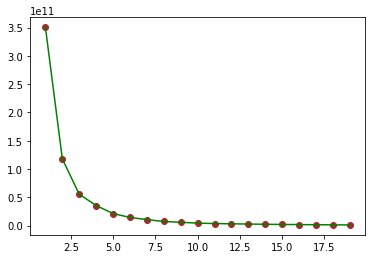

In [26]:
#Merencanakan nilai wrt 'k' inersia
plt.plot(np.arange(1,20), ssd, color = "green")
plt.scatter(np.arange(1,20), ssd, color = "brown")
plt.show()

In [27]:
#Melatih dengan KMeans dan memprediksi ClusterID.
model = KMeans(n_clusters=5)
ClusterID = model.fit_predict(RMF1)

In [28]:
RMF1["ClusterID"] = ClusterID
RMF1

,Monetry,Frequence,Recency,ClusterID
0,77183.60,1,326,2
1,4310.00,182,2,0
2,1797.24,31,75,0
3,1757.55,73,19,0
4,334.40,17,310,0
...,...,...,...,...
4334,180.60,10,278,0
4335,80.82,7,181,0
4336,178.05,12,8,0
4337,2094.88,756,4,0


In [29]:
km_cluster_sale = RMF1.groupby("ClusterID").Monetry.mean()
km_cluster_Recency = RMF1.groupby("ClusterID").Recency.mean()
km_cluster_Frequence = RMF1.groupby("ClusterID").Frequence.mean()

In [30]:
import seaborn as sns

<AxesSubplot:ylabel='Recency'>

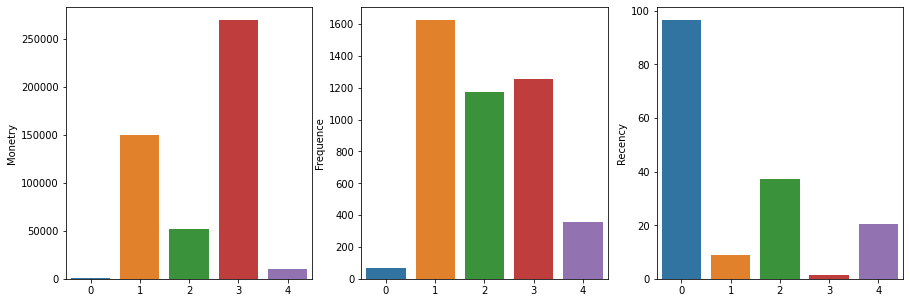

In [31]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_sale , ax = axs[0])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Frequence , ax = axs[1])
sns.barplot(x = [0,1,2,3,4],  y = km_cluster_Recency , ax = axs[2])

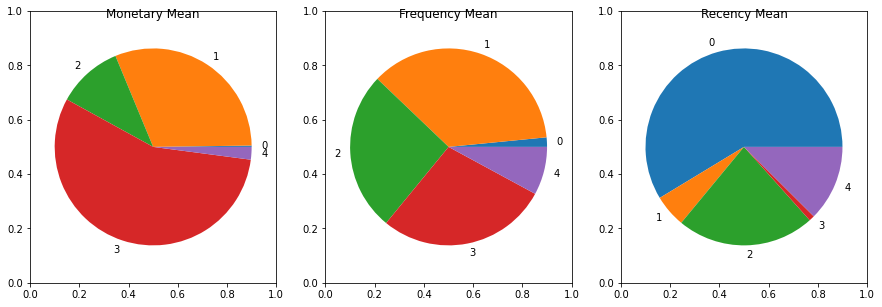

In [32]:
fig, axs = plt.subplots(1,3, figsize = (15, 5))

ax1 = fig.add_subplot(1, 3, 1)
plt.title("Monetary Mean")
ax1.pie(km_cluster_sale, labels = [0,1,2,3,4])

ax1 = fig.add_subplot(1, 3, 2)
plt.title("Frequency Mean")
ax1.pie(km_cluster_Frequence, labels = [0,1,2,3,4])

ax1 = fig.add_subplot(1, 3, 3)
plt.title("Recency Mean")
ax1.pie(km_cluster_Recency, labels = [0,1,2,3,4])

plt.axis("off")
plt.show()